In [26]:
import importlib
import modules
from collections import Counter
import numpy as np

importlib.reload(modules)

from modules import CA
import matplotlib.pyplot as plt

from modules import run_model_stochastic
import random

importlib.reload(modules)

<module 'modules' from '/Users/jennadevries/Documents/GitHub/CSS-Group1/modules.py'>

In [49]:
def kinematic_wave_model(initial_density, road_length, time_steps, dt, vmax, density_function, jam_threshold):
    """
    Kinematic Wave model for traffic flow simulation.

    Parameters:
    - initial_density: Initial density profile along the road.
    - road_length: Length of the road.
    - time_steps: Number of time steps.
    - dt: Time step size.
    - vmax: Maximum speed of vehicles.
    - density_function: Function representing the initial density profile.
    - jam_threshold: Threshold density for identifying traffic jams.

    Returns:
    - density_history: List of density profiles at each time step.
    - num_jams: List of the number of jams at each time step.
    """

    density_history = [initial_density.copy()]
    num_jams = []
    speed = np.zeros((time_steps, len(initial_density)))

    for t in range(time_steps):
        current_density = density_history[-1]

        # Calculate flow and speed
        flow = current_density * vmax
        speed[t] = np.round(vmax * (1 - current_density))
        
        # Update density using the conservation equation
        density_change = (flow[:-1] - flow[1:]) * dt / road_length
        current_density[1:] += density_change
        current_density[0] += (flow[-1] - flow[0]) * dt / road_length

        # Apply the density function for dynamic variations
        current_density = density_function(current_density)

        density_history.append(current_density.copy())

        # Identify the number of jams
        num_jam = np.sum(current_density > jam_threshold)
        num_jams.append(num_jam)

    return speed



[  2.   1.   0.   2.   2.   5.   5.   1.   3.   0.   5.   1.   0.   4.
   1.   1.   5.   2.   1.   1.   1.   3.   3.   2.   3.   3.   3.   4.
   0.   4.   0.   2.   3.   4.   0.   4.   3.   2.   0.   1.   5.   4.
   3.   0.   2.   1.   0.   1.   4.   0.   0.   5.   0.   2.   4.   0.
   1.   0.   2.   0.   1.   3.   2.   0.   2.   0.   0.   0.   2.   0.
   0.   4.   0.   4.   5.   0.   0.   0.   1.   0.   5.   1.   1.   2.
   2.   2.   1.   3.   1.   3.   1.   3.   1.   0.   3.   4.   0.   1.
   1.   4.   2.   1.  -1.   1.   1.   3.   3.  -1.   1.  -3.   1.  -2.
  -3.  -0.  -3.  -3.   0.  -2.  -4.  -4.  -4.  -2.  -2.  -3.  -2.  -2.
  -2.  -1.  -5.  -1.  -4.  -3.  -2.  -1.  -4.   0.  -0.  -2.  -3.  -3.
   2.   2.   1.  -2.   1.  -0.  -1.  -0.   3.   0.   0.   5.   1.   3.
   5.   2.   3.   3.   5.   3.   4.   5.   5.   4.   5.   4.   5.   5.
   5.   5.   5.   5.   5.   5.   5.   5.   5.   5.   5.   5.   5.   5.
   5.   5.   5.   5.   5.   5.   4.   5.   3.   5.   3.   2.   5.   5.
   1. 

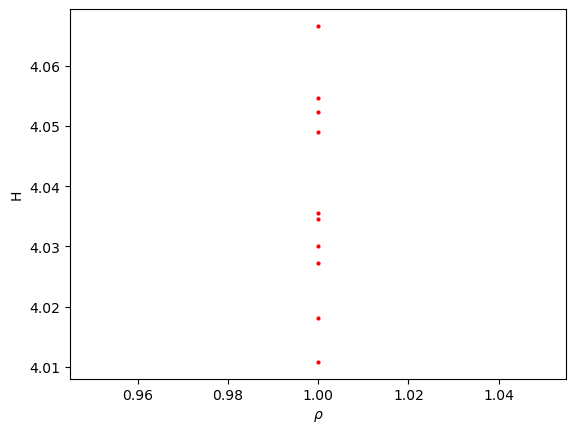

In [48]:
# Example Usage:

road_length = 10.0
time_steps = 10
dt = 0.1
vmax = 5
jam_threshold = 0.8
trials = 10

def density_function(density):
    # Example of a density function that adds a sinusoidal perturbation
    perturbation = np.sin(np.linspace(0, 2 * np.pi, len(density)))
    return np.maximum(density + perturbation, 0)

for n in range(trials):
    initial_density = np.abs(np.sin(np.linspace(0, 2 * np.pi, 100)))
    random.shuffle(initial_density)

    speed = kinematic_wave_model(initial_density, road_length, time_steps, dt, vmax, density_function, jam_threshold).flatten()
    print(speed)
    counts_speed = Counter(speed)
    probabilities = [count / len(speed) for count in counts_speed.values()]

    shannon_entropy = -sum(p * np.log2(p) for p in probabilities)

    plt.plot(1, shannon_entropy, 'o', markersize=2, color='red')

plt.ylabel(f'H')
plt.xlabel(r'$\rho$')
plt.show()
